# Extracción de características

## Fonocardiograma

El objetivo de esta práctica es aplicar los conocimientos adquiridos sobre el diseño de filtros Butterworth digitales y filtros Chabysev digitales tipo 1 y 2, para evaluar su desempeño como filtros notch.

## Actividades

1. Descargar el archivo de audio 'PCG 60.npz'
2. Obtener la FFT de la señal de forma digital
3. Identificar la interferencia en la FFT
4. Diseñar un filtro digital tipo Butterworth rechaza banda orden 2 para eliminar la interferencia
5. Implementar los filtros con fase cero en código
6. Caracterizar la respuesta en frecuencia de los filtros
7. Diseñar un filtro digital tipo Butterworth rechaza banda orden 4 para eliminar la interferencia
8. Implementar los filtros con fase cero en código
9. Caracterizar la respuesta en frecuencia de los filtros
10. Diseñar un filtro digital tipo Chebyshev rechaza banda orden 4 tipo 1 para eliminar la interferencia
11. Implementar los filtros con fase cero en código
12. Caracterizar la respuesta en frecuencia de los filtros
13. Diseñar un filtro digital  tipo Chebyshev rechaza banda orden 4 tipo 2 para eliminar la interferencia
14. Implementar los filtros con fase cero en código
15. Caracterizar la respuesta en frecuencia de los filtros

####  Importar librerías 

In [7]:
!pip install PyAudio

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 KB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for PyAudio (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [17 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-3.10
      creating build/lib.linux-x86_64-3.10/pyaudio
      copying src/pyaudio/__init__.py -> build/lib.linux-x86_64-3.10/pyaudio
      running build_ext
      creating build/temp.linux-x86_64-3.10
      creating build/temp.linux-x86_64-3.10/src
      creating build/temp.linux-x86_64-3.10/src/pyaudio
      x86_64-linux-gnu-gcc -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-str

In [6]:
import sounddevice as sd

OSError: PortAudio library not found

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sg 
import os 
import sounddevice as sd

OSError: PortAudio library not found

#### Definir funciones propias

##### Función para calcular FFT en dB de una señal

In [2]:
def fou(senal,sr):
    """senal: señal a la que desea obtener la transformada de Fourier
    sr: Frecuencia de muestreo de la señal"""
    f = np.fft.fft(senal)
    h = 20*np.log10(np.abs(f))[:int(f.shape[0]/2)]
    w = np.linspace(0,sr/2,int(f.shape[0]/2))
    
    return h, w

##### Función para caracterizar filtros

In [3]:
def freqz_plot(b,a,sr):
    """ba: coeficientes del diseño del filtro
    sr: Frecuencia de muestreo"""
    w, h = sg.freqz(b,a)
    h[h==0] = 1E-5

    H = 20*np.log10( np.abs(h))
    W = np.angle(h)
    W = np.unwrap(W)
    W = np.degrees(W)
    w = np.linspace(0,sr//2,H.shape[0] )
    
    return w,W,H

#### Configuración de Path

In [4]:
"""Configuración de path de datos"""
datapath = os.path.abspath('..\\..\\..\\data\\}')
print(datapath)

"""Configuración de path src"""
srcpath = os.path.abspath('')
print(srcpath)

C:\Users\enriq\1_ServicioSocial\Servicio-Social-UAM\FAyD\data
C:\Users\enriq\1_ServicioSocial\Servicio-Social-UAM\FAyD\src\Prácticas\Práctica3


#### Importación y análisis de la señal

In [5]:
#Cargar archivo npz de señal de fonocardiograma contaminado
PCG = np.load(datapath+'\\PCG_60.npz')

for i in PCG.keys(): #Observar las variables que se encuentran en el archivo npz
    print (i)

PCG
sr


In [6]:
# Asignación de variables que se encuentran en los archivos npz

sr  = PCG['sr']
PCG = PCG['PCG']

In [7]:
#Reproducción de audio de fonocardiograma contaminado 
sd.play(PCG,sr)

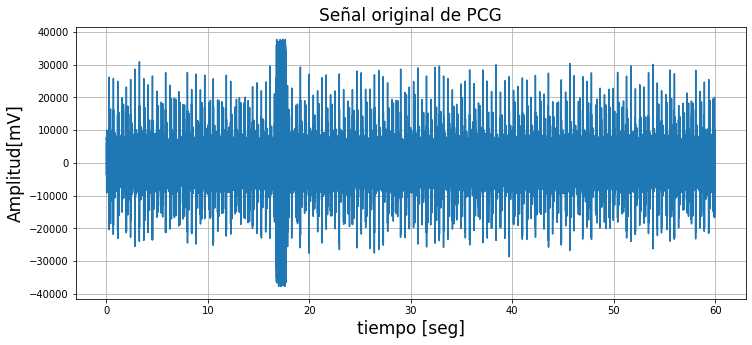

In [8]:
# Grafica de la señal 

t = np.linspace(0,PCG.shape[0]/sr,PCG.shape[0]) # Eje de tiempo

plt.figure(figsize=(12,5))
plt.plot(t,PCG) 
plt.title('Señal original de PCG',fontsize=17)
plt.xlabel('tiempo [seg]',fontsize=17)
plt.ylabel('Amplitud[mV]',fontsize=17)
plt.grid(True)
plt.savefig(srcpath+'\\PCG.png')

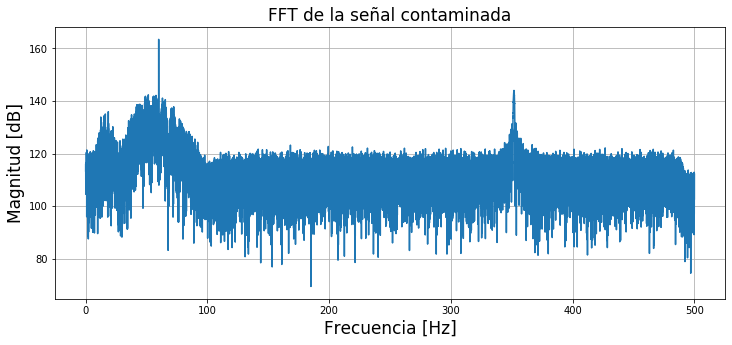

In [9]:
# FFT de la señal contaminada 

h,w = fou(PCG,sr)
plt.figure(figsize=(12,5))
plt.plot(w,h)
plt.title('FFT de la señal contaminada',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)
plt.savefig(srcpath+'\\FFT_c.png')

#### Filtro Butterworth rechaza banda orden 2

In [10]:
# Diseño de filtro rechaza banda orden 2

n   = 2
fc  = 2*np.array( [58.0,62.0] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

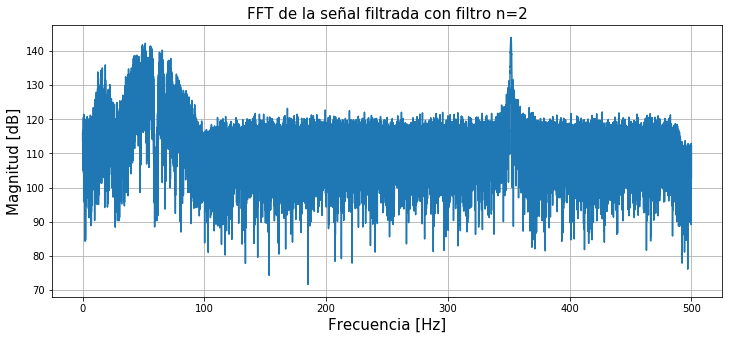

In [11]:
# Filtrado de la señal

PCG_2 = sg.lfilter(b,a,PCG)
PCG_2 = sg.lfilter(b,a,PCG_2[::-1])[::-1] #Implementación del filtro en fase cero

# FFT de señal filtrada 

h2,w2 = fou(PCG_2,sr)
plt.figure(figsize=(12,5))
plt.plot(w2,h2)
plt.title('FFT de la señal filtrada con filtro n=2',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(srcpath+'\\FFT_RB2')

In [12]:
print(b,a)

[ 0.98238544 -3.65388402  5.36233458 -3.65388402  0.98238544] [ 1.         -3.68635329  5.36202428 -3.62141475  0.96508117]


$$\text{H(z) = }\dfrac{0.982z^4 - 3.653z^3 + 5.362z^2 - 3.653z^1 + 0.982}{z^4 - 3.686z^3 + 5.362z^2 - 3.621z^1 + 0.965}$$

In [13]:
"""Audio de la señal filtrada"""
sd.play(PCG_2,sr)

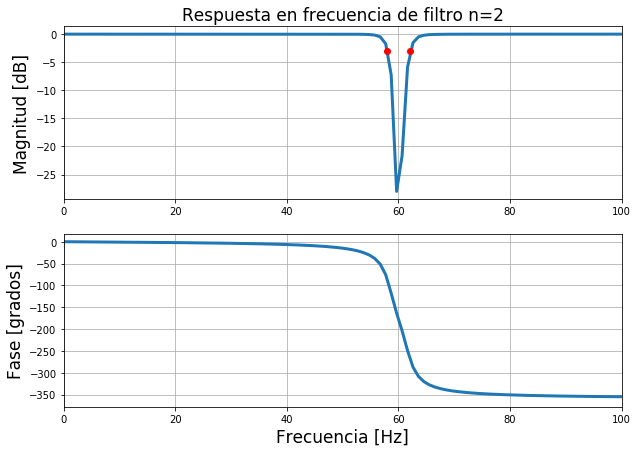

In [14]:
# Caracterización del filtro n=2

w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.title('Respuesta en frecuencia de filtro n=2',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=17)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=17)
plt.ylabel('Fase [grados]',fontsize=17)
plt.grid(True)
plt.savefig(srcpath+'\\RF_RB2')

#### Filtro Chebyshev rechaza banda orden 4 tipo 1

In [ ]:
#Diseño de filtro Chebyshev tipo 1 orden 4 

n     = 4
fc1   = 2*np.array( [58,62] )/sr 
b1,a1 = sg.cheby1(n,2,fc1,btype='bandstop')

In [ ]:
#Filtrado de la señal en fase cero 
PCG1 = sg.lfilter(b1,a1,PCG)
PCG1 = sg.lfilter(b1,a1,PCG1[::-1])[::-1]

#FFT de la señal filtrada 
h1,w1 = fou(PCG1,sr)
plt.figure(figsize=(12,5))
plt.plot(w1,h1)
plt.xlabel('Frecuencia (Hz)',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(srcpath+'\\FFT_Cheby1PCG')

In [ ]:
#Reproducir señal filtrada 
sd.play(PCG1,sr)

In [ ]:
#Caracterización de filtros
w1,W1,H1 = freqz_plot(b1,a1,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w1,H1,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w1,W1,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
plt.savefig(srcpath+'\\RF_Cheby1PCG')

In [ ]:
print(b1,a1)

#### Filtro Butterworth rechaza banda orden 4

In [15]:
"""Diseño de filtro orden 4"""

n   = 4
fc  = 2*np.array( [59.,61.] )/sr
b,a = sg.butter(n,fc,btype = 'bandstop', output='ba')

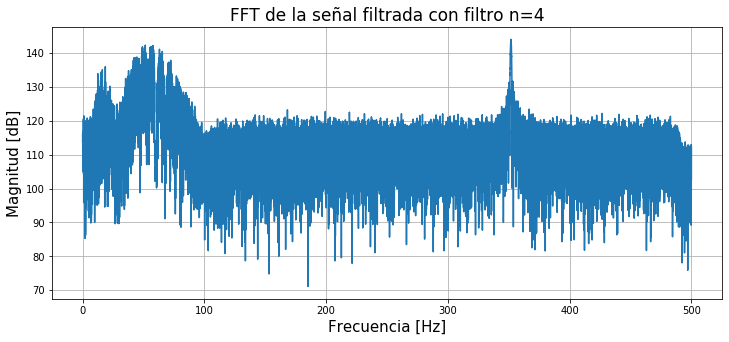

In [16]:
# Filtrado de la señal

PCG_4 = sg.lfilter(b,a,PCG)
PCG_4 = sg.lfilter(b,a,PCG_4[::-1])[::-1] #implementación del filtro en fase cero

# FFT de señal filtrada 

h4,w4 = fou(PCG_4,sr)
plt.figure(figsize=(12,5))
plt.plot(w4,h4)
plt.title('FFT de la señal filtrada con filtro n=4',fontsize=17)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)
plt.savefig(srcpath+'\\FFT_RB4')

In [17]:
print(b,a)

[  0.98371517  -7.31722634  24.34541856 -47.2551875   58.48694256
 -47.2551875   24.34541856  -7.31722634   0.98371517] [  1.          -7.40782667  24.54573916 -47.44866117  58.48576033
 -47.06072752  24.146015    -7.22761231   0.96769554]


In [18]:
"""Audio de señal filtrada"""
sd.play(PCG_4,sr)

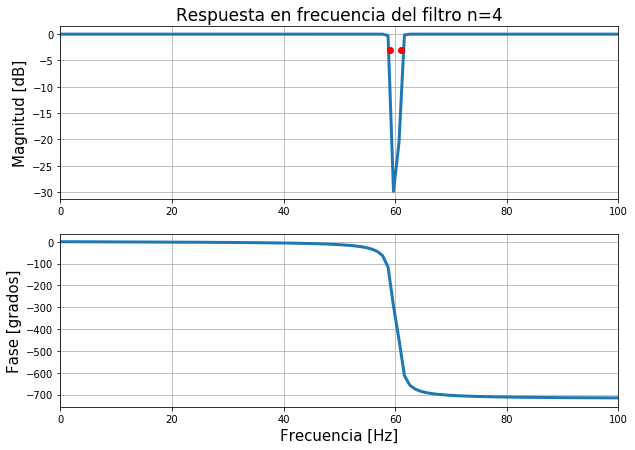

In [19]:
# Caracterización del filtro n=4

w,W,H = freqz_plot(b,a,sr)
plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w,H,linewidth=3)
fc1 = plt.plot(59,-3,'ro')
fc2 = plt.plot(61,-3,'ro')
plt.xlim(0,100)
plt.title('Respuesta en frecuencia del filtro n=4',fontsize=17)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w,W,linewidth=3)
plt.xlim(0,100)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.ylabel('Fase [grados]',fontsize=15)
plt.grid(True)
plt.savefig(srcpath+'\\RF_RB4')

#### Filtro Chebyshev rechaza banda orden 4 tipo 2

In [ ]:
#Diseño de filtro Chebyshev tipo 2 orden 4

fc2   = 2*np.array( [58.5,61.5] )/sr
b2,a2 = sg.cheby2(n,20,fc2,btype='bandstop')

In [ ]:
# Filtrado de la señal 

PCG2 = sg.lfilter(b2,a2,PCG)
PCG2 = sg.lfilter(b2,a2,PCG2[::-1])[::-1]

# FFT de la señal filtrada 
H2,w2 = fou(PCG2,sr)

plt.figure(figsize=(12,5))
plt.plot(w2,H2)
plt.xlabel('Frecuencia [Hz]', fontsize=15)
plt.ylabel('Magnitud[dB]',fontsize=15)
plt.grid(True)
plt.savefig(srcpath+'\\FFT_Cheby2PCG')

In [ ]:
sd.play(PCG2,sr)

In [ ]:
# Caracterización del filtro 

w2,W2,H2 = freqz_plot(b2,a2,sr)

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
plt.plot(w2,H2,linewidth=3)
plt.ylabel('Magnitud [dB]',fontsize=15)
plt.xlim(0,100)
fc1 = plt.plot(58.,-3, 'ro') # Frecuencia de corte 1 en la gráfica de magnitud
fc2 = plt.plot(62.,-3,'ro') # Frecuencia de corte 2 en la gráfica de magnitud
plt.xlim(0,100)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(w2,W2,linewidth=3)
plt.ylabel('Fase [grados]',fontsize=15)
plt.xlabel('Frecuencia [Hz]',fontsize=15)
plt.xlim(0,100)
plt.grid(True)
plt.savefig(srcpath+'\\RF_Cheby2PCG')